# Doublet - Source and Sink Together

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

X, Y = np.meshgrid(x, y)

In [29]:
kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0
x_doublet2, y_doublet2 = 1.0, 0.0

# Create functions for doublet velocities and streamlines

In [47]:
def get_velocity(strength, xd, yd, X, Y):
    u = -strength / (2 * math.pi) * ((X - xd)**2 - (Y - yd)**2) / ((X - xd)**2 + (Y - yd)**2)**2
    v = -strength / (2 * math.pi) * 2 * (X - xd) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)**2
    return u, v

def get_stream_function(strength, xd, yd, X, Y):
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    return psi

In [48]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity(kappa, x_doublet, y_doublet, X, Y)
u_doublet2, v_doublet2 = get_velocity(kappa, x_doublet2, y_doublet2, X, Y)
# compute the stream-function on the mesh grid
psi_doublet = get_stream_function(kappa, x_doublet, y_doublet, X, Y)
psi_doublet2 = get_stream_function(kappa, x_doublet2, y_doublet2, X, Y)

In [49]:
u = u_doublet + u_doublet2
v = v_doublet + v_doublet2
psi = psi_doublet + psi_doublet2

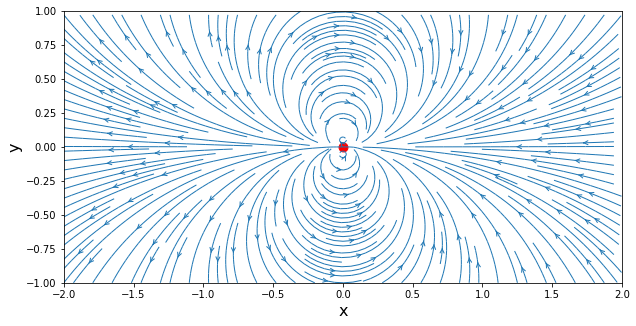

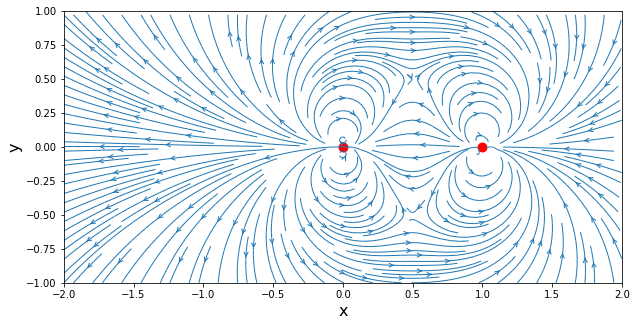

In [51]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='red', s=80, marker='o');

plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter([x_doublet, x_doublet2], [y_doublet, y_doublet2], color='red', s=80, marker='o');



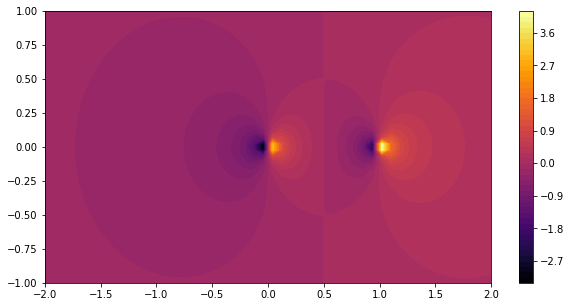

In [38]:
phi1 = (kappa/(2*math.pi))*(X-x_doublet)/((X-x_doublet)**2+(Y-y_doublet)**2)
phi2 = (kappa/(2*math.pi))*(X-x_doublet2)/((X-x_doublet2)**2+(Y-y_doublet2)**2)
phi = phi + phi2
plt.figure(figsize=(width, height))
plt.contourf(X, Y, phi, 50, cmap='inferno')
plt.colorbar(extend='both');

# Uniform flow past a doublet

In [39]:
u_inf = 1.0 

In [40]:
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

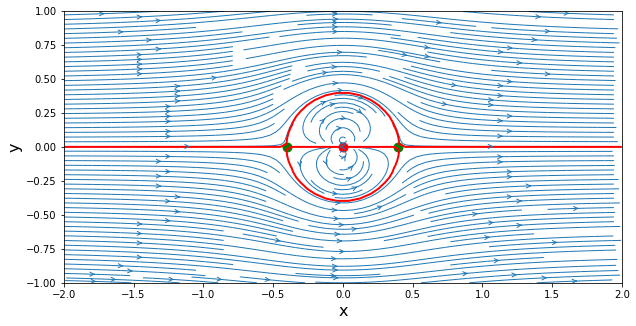

In [53]:
# superposition of the doublet on the freestream flow
ufs = u_freestream + u_doublet
vfs = v_freestream + v_doublet
psifs = psi_freestream + psi_doublet

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, ufs, vfs, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psifs, levels=[0.], colors='red', linewidths=2, linestyles='solid')
plt.scatter(x_doublet, y_doublet, color='red', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

# Bernoulli's equation and the pressure coefficient

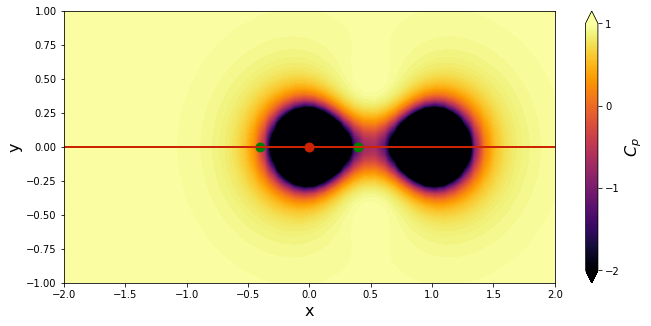

In [52]:
# compute the pressure coefficient field
cp = 1.0 - (ufs**2 + vfs**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(1.1 * width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, cp, levels=np.linspace(-2.0, 1.0, 100), extend='both', cmap='inferno')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
plt.contour(X, Y, psifs, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');